In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor


In [4]:
df = pd.read_csv('yield_df.csv')

In [5]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.shape

(28242, 7)

#### df.info()

In [8]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
df.duplicated().sum()

2310

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

# Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [12]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [13]:
df = df.drop(to_drop)

In [14]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [15]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area

In [16]:
len(df['Area'].unique())

101

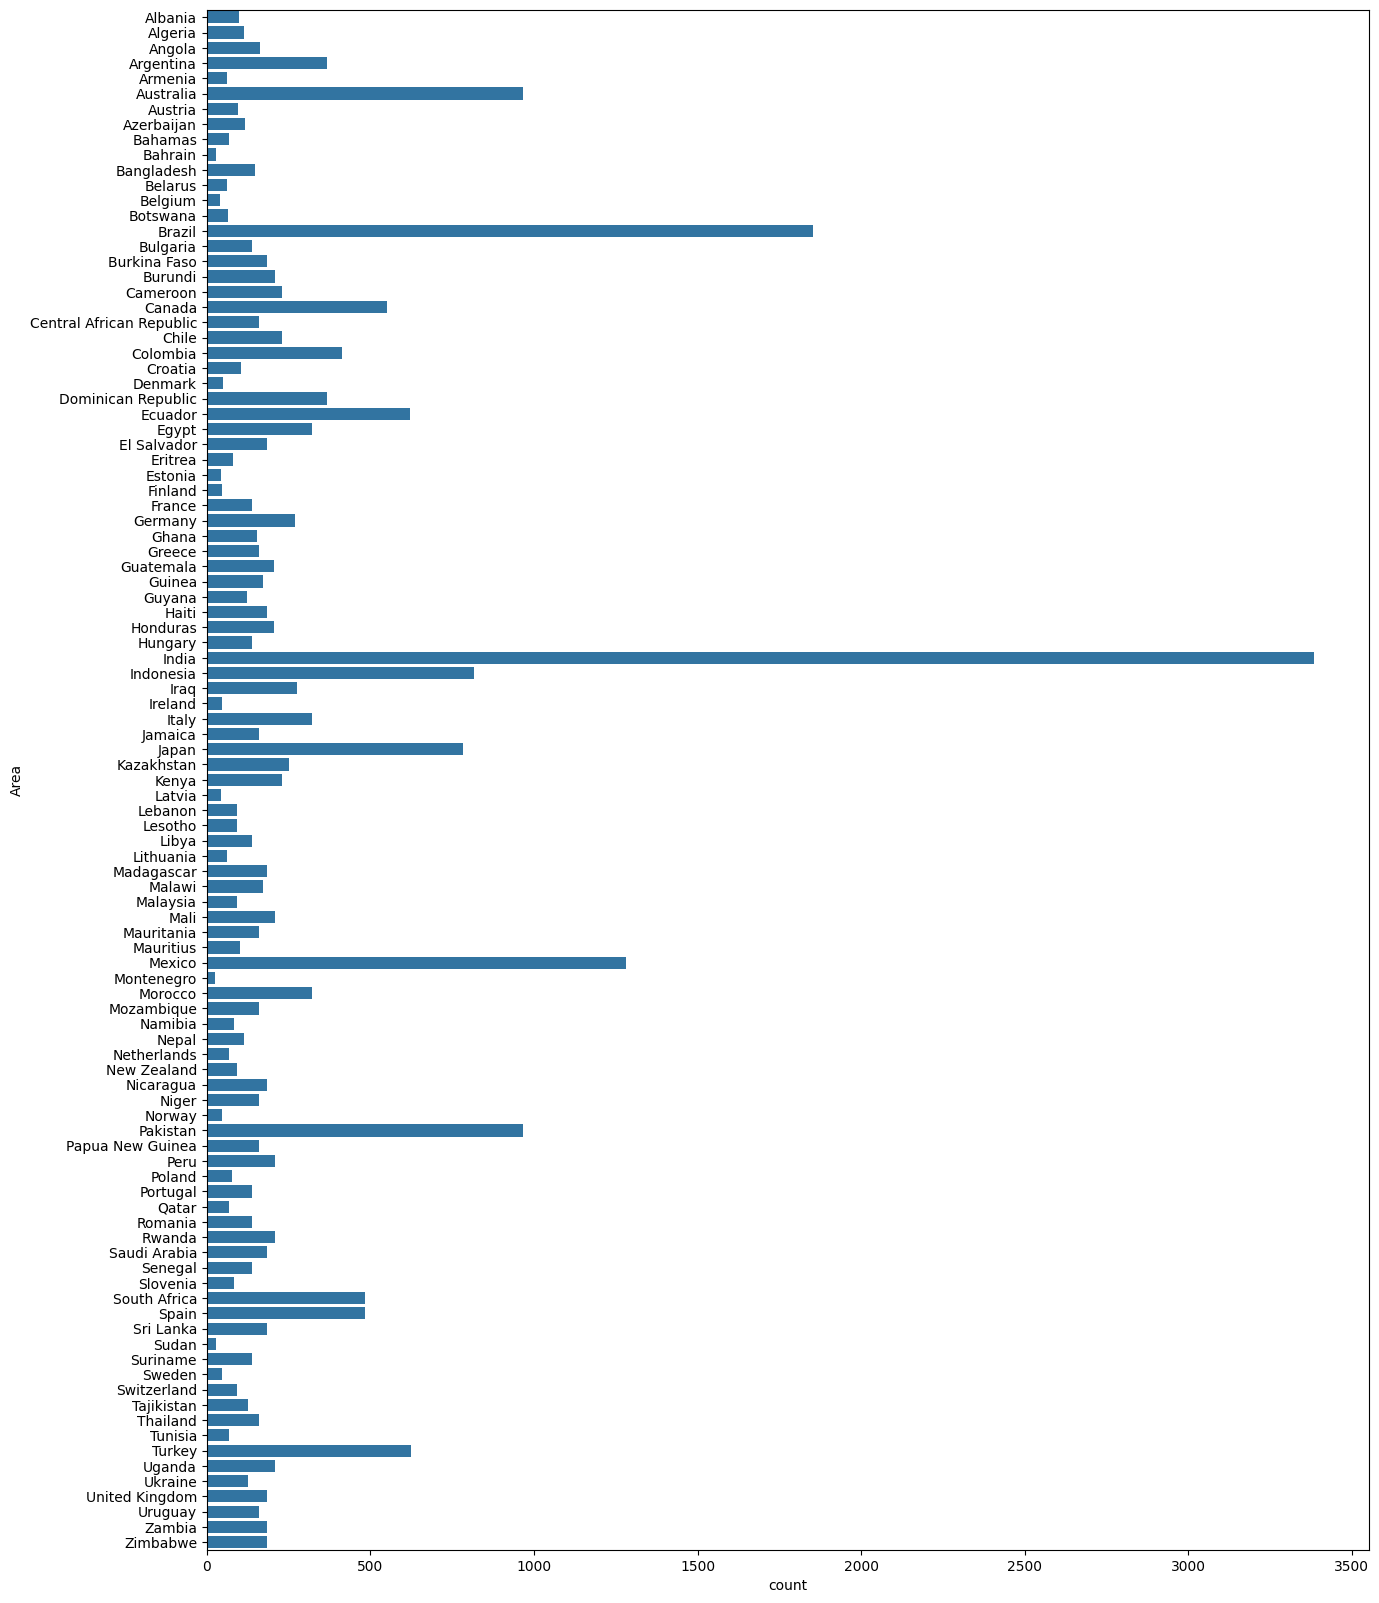

In [17]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [18]:
(df['Area'].value_counts() < 500).sum()

91

# yield_per_country

In [19]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())


In [20]:
df['hg/ha_yield'].sum()

1996196943

In [21]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

# Yield Per Country Graph

<Axes: >

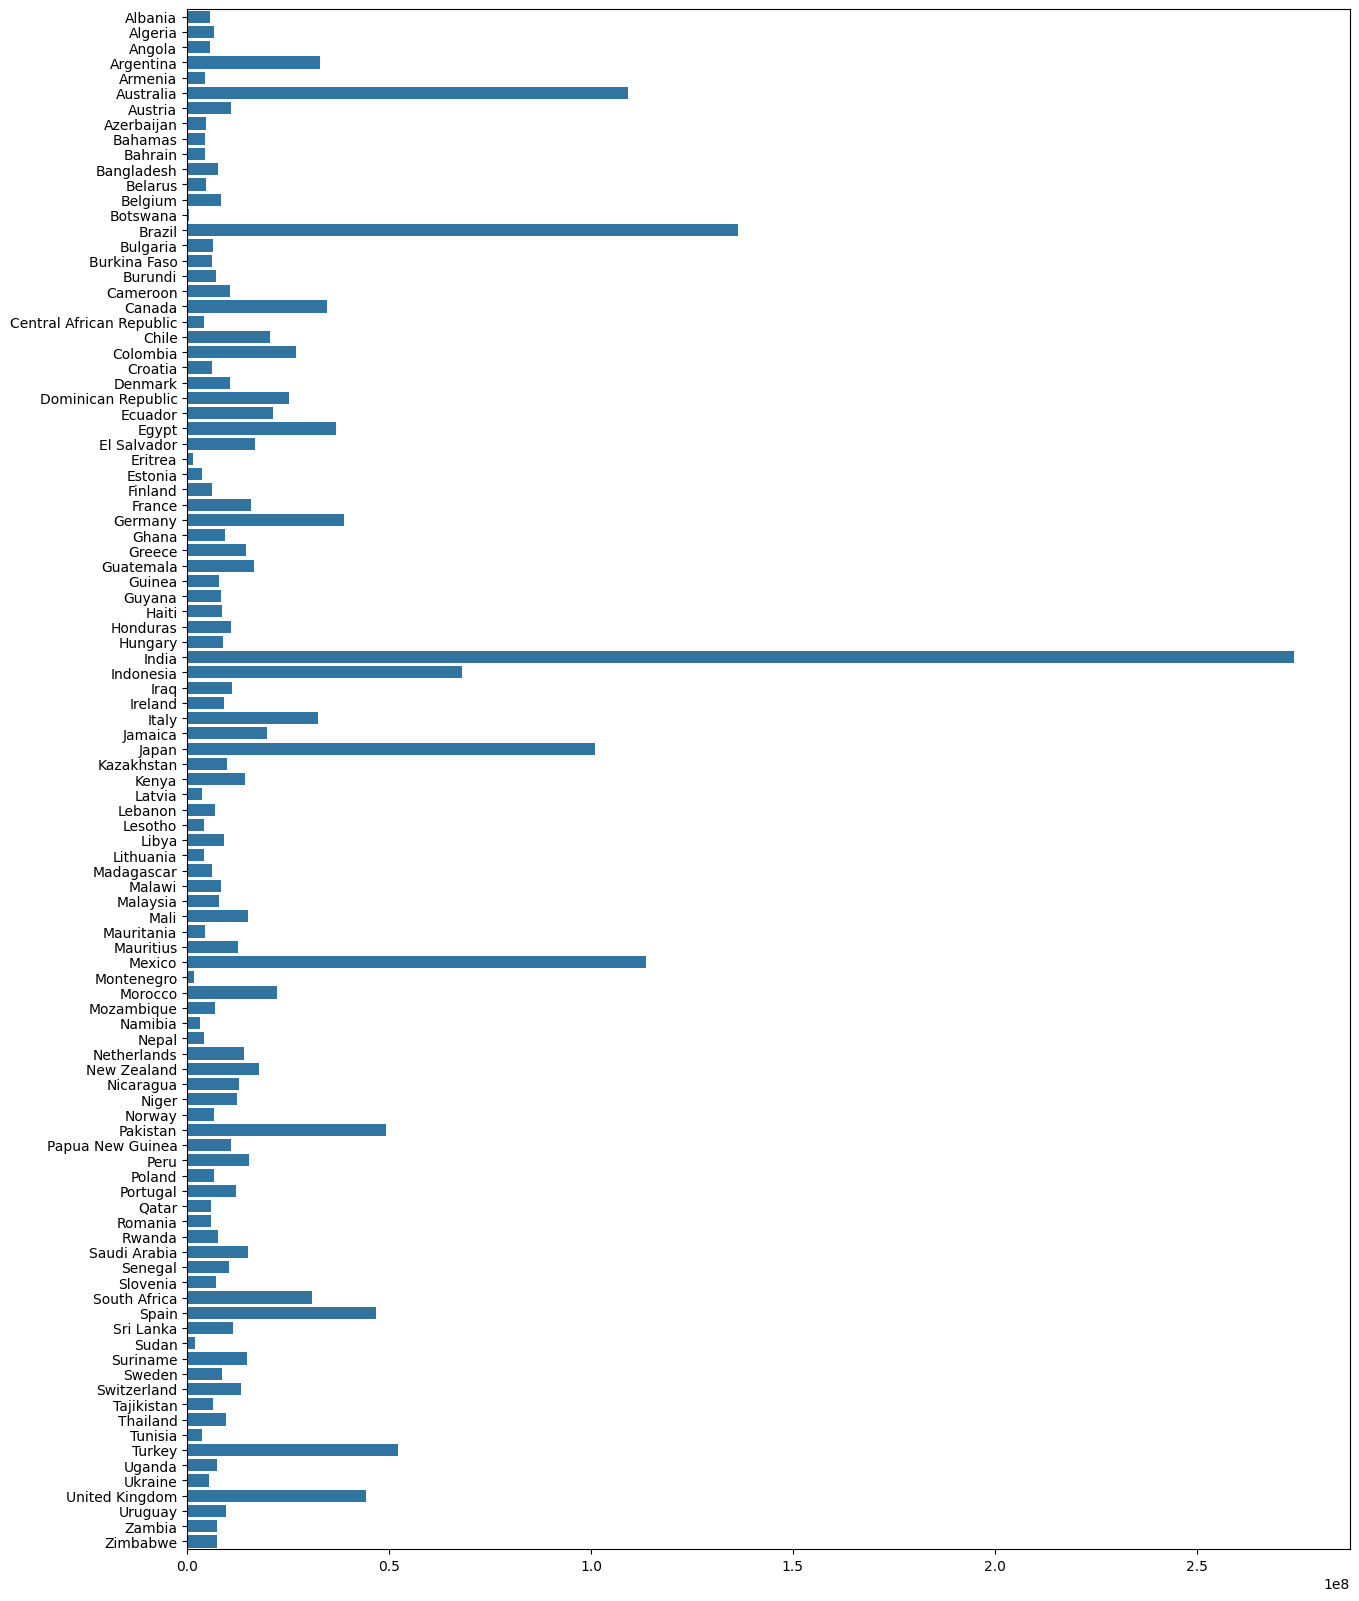

In [22]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

# Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Item'>

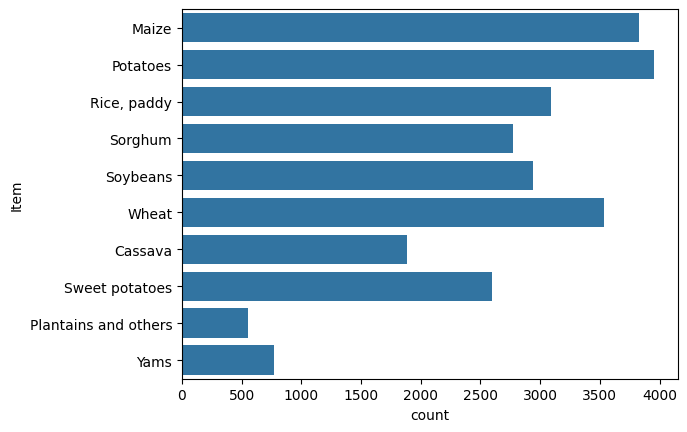

In [23]:
sns.countplot(y=df['Item'])

# Yield Vs Item

In [24]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

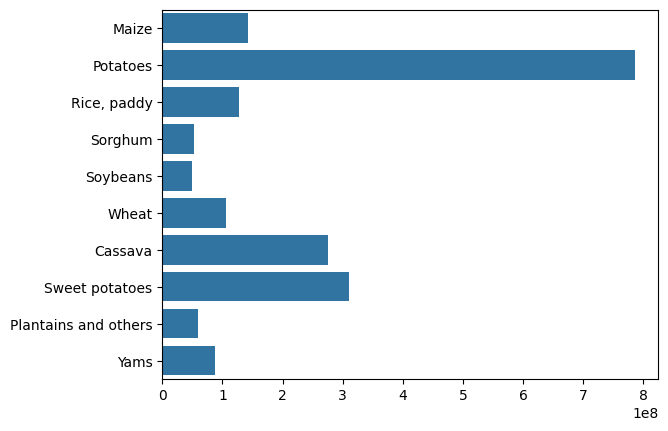

In [25]:
sns.barplot(y=crops,x=yield_per_crop)

# Train Test split Rearranging Columns

In [26]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [27]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [29]:
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()
preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [30]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [31]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

# Let's train our model

In [32]:
results = {}

# Linear Regression, Lasso Regression, Ridge Regression, and Decision Tree

In [33]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso Regression':Lasso(),
    'Ridge Regression':Ridge(),
    'Decision Tree':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)

    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    train_r2 = r2_score(y_train, md.predict(X_train_dummy))
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} Test R^2 score : {r2_score(y_test,y_pred)}  Train R^2 score : {r2_score(y_train, md.predict(X_train_dummy))}")
    
    results[name] = {
        'MAE': test_mae,
        'Test R^2 Score': test_r2,
        'Train R^2 Score' : train_r2

    }


Linear Regression : mae : 29907.52818929297 Test R^2 score : 0.7473119719734604  Train R^2 score : 0.7518631997225338


/Users/parasmotwani/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771845.671875, tolerance: 14848622817.505169
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso Regression : mae : 29893.99762450549 Test R^2 score : 0.7473261756207232  Train R^2 score : 0.7518507070778551
Ridge Regression : mae : 29863.940407206435 Test R^2 score : 0.7473062492833209  Train R^2 score : 0.7518205902108608
Decision Tree : mae : 3892.87314439946 Test R^2 score : 0.9801601959874682  Train R^2 score : 1.0


Checking for top features affecting yield predictions in Linear Regression model

In [34]:
feature_names = list(preprocesser.get_feature_names_out())

coefficients = models['Linear Regression'].coef_

feature_importance = dict(zip(feature_names, coefficients))

sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

print("\n🔍 **Top Features Affecting Yield Prediction:**")
for feature, coef in sorted_features:
    print(f"{feature}: {coef:.4f}")


🔍 **Top Features Affecting Yield Prediction:**
OHE__Item_Soybeans: -145953.6729
OHE__Area_United Kingdom: 141427.1848
OHE__Item_Wheat: -138965.1992
OHE__Item_Sorghum: -134754.5819
OHE__Area_Belgium: 129378.5545
OHE__Area_Netherlands: 124087.2043
OHE__Item_Maize: -123061.5189
OHE__Item_Rice, paddy: -115002.8927
OHE__Area_New Zealand: 105381.1864
OHE__Area_Denmark: 98007.9895
OHE__Area_Ireland: 89224.0893
OHE__Area_Switzerland: 84710.9101
OHE__Area_Germany: 78552.9161
OHE__Area_Sweden: 78039.5674
OHE__Area_Central African Republic: -75433.3319
OHE__Area_France: 60100.5240
OHE__Area_Burkina Faso: -58222.8314
OHE__Area_Haiti: -57192.3612
OHE__Area_Eritrea: -56680.0664
OHE__Area_Mauritania: -55941.0948
OHE__Area_Japan: 53344.3227
OHE__Area_Guinea: -50099.7298
OHE__Area_Austria: 50089.8061
OHE__Area_Angola: -48470.2811
OHE__Area_Uganda: -47005.2375
OHE__Area_Australia: 46486.0110
OHE__Area_Burundi: -45794.4146
OHE__Area_Norway: 43537.2966
OHE__Area_Egypt: 43331.3179
OHE__Area_Rwanda: -43017

# Random Forest Regressor

In [35]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_dummy, y_train)

# Predictions
y_pred_rf_test = rf.predict(X_test_dummy)
y_pred_rf_train = rf.predict(X_train_dummy)  # Get predictions for training data

# Evaluation
test_mae = mean_absolute_error(y_test, y_pred_rf_test)
test_r2 = r2_score(y_test, y_pred_rf_test)
train_r2 = r2_score(y_train, y_pred_rf_train) 

print(f"RF : MAE : {test_mae} | Test R^2 Score : {test_r2} | Train R^2 Score : {train_r2}")

# Store results
results['Random Forest'] = {
    'MAE': test_mae,
    'Test R^2 Score': test_r2,
    'Train R^2 Score': train_r2
}


RF : MAE : 13417.072503128089 | Test R^2 Score : 0.9223293416463438 | Train R^2 Score : 0.9345486176271034


# Optimized XGBoost Regressor (Hyper-tuned)

In [36]:
xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 300, 400], 
    'max_depth': [5, 7, 9],  
    'learning_rate': [0.05, 0.1],  
    'subsample': [0.7, 0.8, 1], 
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 0.1, 0.5],  # L1 Regularization (Lasso)
    'reg_lambda': [0.5, 1, 2]  # L2 Regularization (Ridge)
}


grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_dummy, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_xgb = grid_search.best_estimator_
y_pred_xgb_test = best_xgb.predict(X_test_dummy)
y_pred_xgb_train = best_xgb.predict(X_train_dummy)  # Train predictions

# Evaluation
test_mae_xgb = mean_absolute_error(y_test, y_pred_xgb_test)
test_r2_xgb = r2_score(y_test, y_pred_xgb_test)
train_r2_xgb = r2_score(y_train, y_pred_xgb_train)

print(f"Optimized XGB : MAE : {test_mae_xgb} | Test R^2 Score : {test_r2_xgb} | Train R^2 Score : {train_r2_xgb}")

results['Optimized XGB'] = {
    'MAE': test_mae_xgb,
    'Test R^2 Score': test_r2_xgb,
    'Train R^2 Score': train_r2_xgb
}

/Users/parasmotwani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/parasmotwani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/parasmotwani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/parasmotwani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/parasmotwani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked

Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'subsample': 0.8}
Optimized XGB : MAE : 5168.034905755959 | Test R^2 Score : 0.9866732358932495 | Train R^2 Score : 0.9968525171279907


# Extracting Important Features For XGBoost

NameError: name 'X_train_df' is not defined

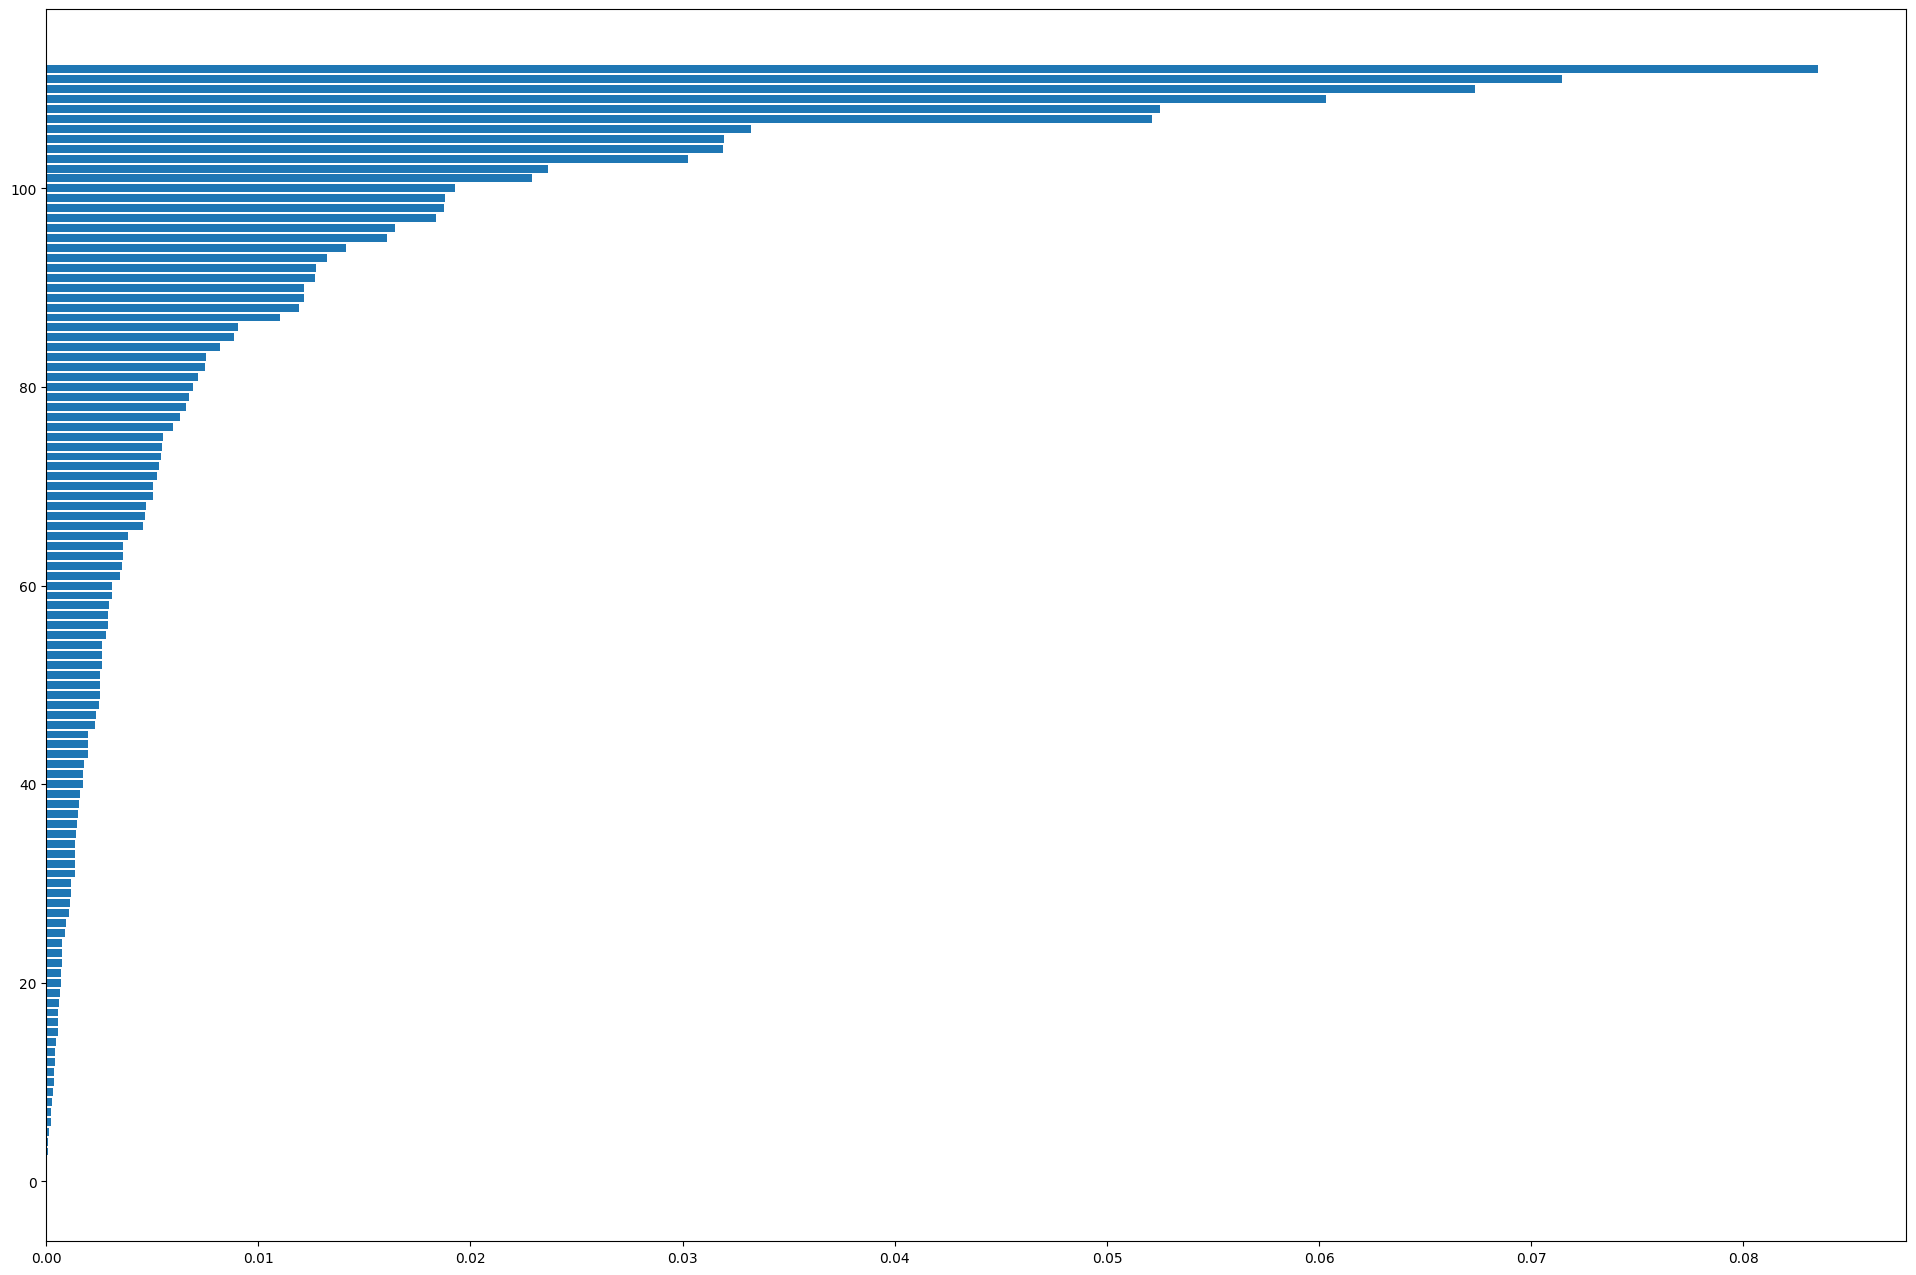

In [37]:
feature_importances = best_xgb.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(24, 16))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train_df.columns[i] for i in sorted_idx], fontsize=8)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
feature_names = list(preprocesser.get_feature_names_out())

# Convert sparse matrices to DataFrames
X_train_df = pd.DataFrame(X_train_dummy.toarray(), columns=feature_names)
X_test_df = pd.DataFrame(X_test_dummy.toarray(), columns=feature_names)

# Get feature importances from trained XGBoost model
feature_importances = best_xgb.feature_importances_

# Set a threshold to filter out less important features
threshold = 0.0015

# Get indices of important features
important_features = np.where(feature_importances > threshold)[0]

# Select only important features
X_train_filtered = X_train_df.iloc[:, important_features]
X_test_filtered = X_test_df.iloc[:, important_features]

print(f"Reduced features from {X_train_df.shape[1]} to {X_train_filtered.shape[1]}")

xgb_filtered = xgb.XGBRegressor(
    n_estimators=300, 
    learning_rate=0.1, 
    max_depth=7, 
    subsample=0.8, 
    colsample_bytree=1, 
    random_state=42
)

xgb_filtered.fit(X_train_filtered, y_train)

y_pred_filtered_test = xgb_filtered.predict(X_test_filtered)
y_pred_filtered_train = xgb_filtered.predict(X_train_filtered)  # Train predictions

# Evaluate performance
mae_filtered = mean_absolute_error(y_test, y_pred_filtered_test)
test_r2_filtered = r2_score(y_test, y_pred_filtered_test)
train_r2_filtered = r2_score(y_train, y_pred_filtered_train)

print(f"Optimized XGB (Reduced Features) : MAE: {mae_filtered:.4f} | Test R^2 Score: {test_r2_filtered:.4f} | Train R^2 Score: {train_r2_filtered:.4f}")

results['XGB (Reduced Features)'] = {
    'MAE': mae_filtered,
    'Test R^2 Score': test_r2_filtered,
    'Train R^2 Score': train_r2_filtered
}

Reduced features from 113 to 75
Optimized XGB (Reduced Features) : MAE: 8890.0258 | Test R^2 Score: 0.9624 | Train R^2 Score: 0.9775


In [ ]:
cv_scores = cross_val_score(
    xgb_filtered, X_train_filtered, y_train, 
    scoring='neg_mean_absolute_error', cv=5
)
print(f"Mean CV MAE: {-cv_scores.mean():.4f}")

Mean CV MAE: 8812.8984


In [ ]:
results_df = pd.DataFrame(results)
print("\n📊 **Final Model Comparison:**\n")
results_df



📊 **Final Model Comparison:**



,Linear Regression,Lasso Regression,Ridge Regression,Decision Tree,Random Forest,XGB (Reduced Features)
MAE,29907.528189,29893.997625,29863.940407,3885.307885,13417.072503,8890.025817
Test R^2 Score,0.747312,0.747326,0.747306,0.980078,0.922329,0.962353
Train R^2 Score,{0.7518631997225338},{0.7518507070778551},{0.7518205902108608},{1.0},0.934549,0.977513


# Select model

In [ ]:
best_xgb.fit(X_train_dummy,y_train)
best_xgb.predict(X_test_dummy)

array([ 43554.06 ,  22658.088,  21770.557, ...,  21776.018,  33114.395,
       107615.016], dtype=float32)

# Predictive System

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a dictionary of the input features
    feature_dict = {
        'Year': [Year],
        'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
        'pesticides_tonnes': [pesticides_tonnes],
        'avg_temp': [avg_temp],
        'Area': [Area],
        'Item': [Item]
    }

    features_df = pd.DataFrame(feature_dict)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features_df)
    
    predicted_yield = best_xgb.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)


In [ ]:
result

array([26839.984], dtype=float32)

# Pickle Files

In [ ]:
import pickle
pickle.dump(best_xgb,open('best_xgboost.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))